In [22]:
import pandas

# EDA ->Explanatory data Analysis

data=pandas.read_csv("datasets/supermarket_data.csv")
data

,Invoice ID,city,customertype,gender,product,itemprice,quantity,total,date,time,payment,customersalary,rating
0,750-67-8428,Nairobi,Member,Female,Health and beauty,74.69,7,548.9715,1/5/2019,13:08,MPESA,26.1415,9.1
1,226-31-3081,Nakuru,Normal,Female,Electronic accessories,15.28,5,80.2200,3/8/2019,10:29,Cash,3.8200,9.6
2,631-41-3108,Nairobi,Normal,Female,Home and lifestyle,46.33,7,340.5255,3/3/2019,13:23,Credit card,16.2155,7.4
3,123-19-1176,Nairobi,Member,Female,Health and beauty,58.22,8,489.0480,1/27/2019,20:33,MPESA,23.2880,8.4
4,373-73-7910,Nairobi,Normal,Female,Health and beauty,86.31,7,634.3785,2/8/2019,10:37,MPESA,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,233-67-5758,Nakuru,Normal,Male,Health and beauty,40.35,1,42.3675,1/29/2019,13:46,MPESA,2.0175,6.2
997,303-96-2227,Mombasa,Normal,Female,Home and lifestyle,97.38,10,1022.4900,3/2/2019,17:16,MPESA,48.6900,4.4
998,727-02-1313,Nairobi,Member,Male,Food and beverages,31.84,1,33.4320,2/9/2019,13:22,Cash,1.5920,7.7
999,347-56-2442,Nairobi,Normal,Male,Home and lifestyle,65.82,1,69.1110,2/22/2019,15:33,Cash,3.2910,4.1


In [23]:
# group even furhter
data.groupby(["city","gender"]).size()

city     gender
Mombasa  Female    192
         Male      108
Nairobi  Female    230
         Male      165
Nakuru   Female    203
         Male      103
dtype: int64

In [24]:
data.groupby(["customertype","gender"]).size()

customertype  gender
Member        Female    311
              Male      189
Normal        Female    310
              Male      185
dtype: int64

In [25]:
data.groupby(["gender","city","payment","product"]).size()

gender  city     payment  product               
Female  Mombasa  Cash     Electronic accessories    15
                          Fashion accessories       10
                          Food and beverages         2
                          Health and beauty          6
                          Home and lifestyle         6
                                                    ..
Male    Nakuru   MPESA    Electronic accessories    12
                          Fashion accessories       14
                          Food and beverages        10
                          Health and beauty          9
                          Home and lifestyle         8
Length: 105, dtype: int64

In [26]:
data.groupby(["gender","payment"]).size()

gender  payment    
Female  Cash           159
        Credit card    171
        MPESA          295
Male    Cash           116
        Credit card     84
        MPESA          176
dtype: int64

In [27]:
data.describe()

,itemprice,quantity,total,customersalary,rating
count,998.000000,1001.000000,1001.000000,1001.000000,1001.000000
mean,55.686523,5.505495,322.739927,15.368568,6.972527
std,26.538665,2.925444,245.867115,11.707958,1.717729
min,10.080000,1.000000,10.678500,0.508500,4.000000
25%,32.825000,3.000000,122.524500,5.834500,5.500000
50%,55.230000,5.000000,253.680000,12.080000,7.000000
75%,78.040000,8.000000,471.030000,22.430000,8.500000
max,99.960000,10.000000,1042.650000,49.650000,10.000000


In [28]:
# print out column city
data["city"]

0       Nairobi
1        Nakuru
2       Nairobi
3       Nairobi
4       Nairobi
         ...   
996      Nakuru
997     Mombasa
998     Nairobi
999     Nairobi
1000    Nairobi
Name: city, Length: 1001, dtype: object

In [29]:
# check some proportions based on sum given numbners
data.groupby("customertype").size()

customertype
Member    500
Normal    495
dtype: int64

<AxesSubplot: ylabel='count'>

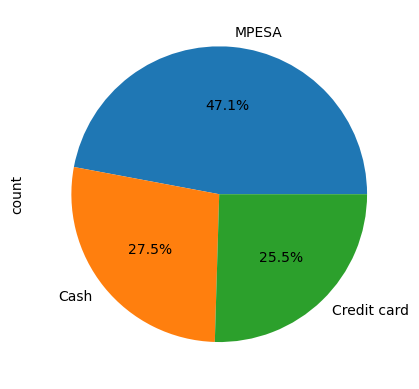

In [30]:
# visualize your output in form of a pie chart 
data["payment"].value_counts().plot.pie(autopct="%1.1f%%")

In [31]:
data.groupby(["city","gender"]).size()

city     gender
Mombasa  Female    192
         Male      108
Nairobi  Female    230
         Male      165
Nakuru   Female    203
         Male      103
dtype: int64

Text(0, 0.5, 'N.o in different cities')

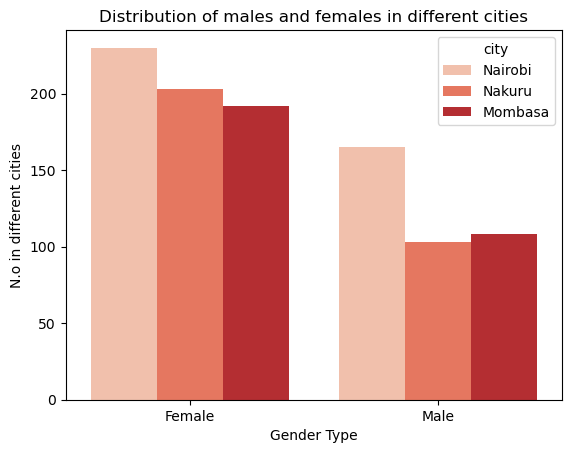

In [32]:
# plottking graphs based on the data you have
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="gender", data=data,palette="Reds",hue="city")
plt.title("Distribution of males and females in different cities")
plt.xlabel("Gender Type")
plt. ylabel("N.o in different cities")

Text(0.5, 1.0, 'Total distribution of gender against Total')

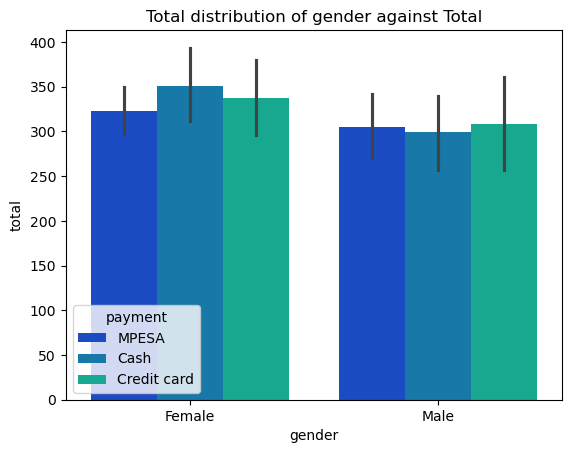

In [33]:
# below is a bar plot->Is a bivariate/multivaritae meaning it expects you to pass more than one column
sns.barplot(x="gender",y='total',data=data,palette="winter", hue="payment")
plt.title("Total distribution of gender against Total")

<AxesSubplot: xlabel='gender', ylabel='total'>

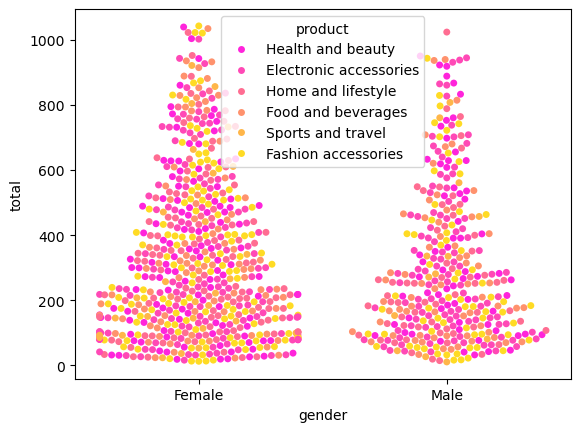

In [34]:
# Below is a swarmPlot
sns.swarmplot(x="gender",y="total", data=data,palette="spring",hue="product")

<AxesSubplot: xlabel='rating', ylabel='total'>

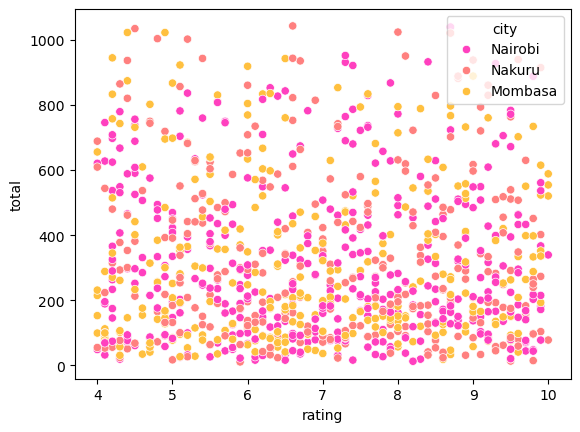

In [35]:
# Below is  a scatterplot which is the pposite of swarmplot.Does nyo categorize entities
sns.scatterplot(x="rating",y="total",data=data,palette="spring",hue="city")

<AxesSubplot: xlabel='date', ylabel='total'>

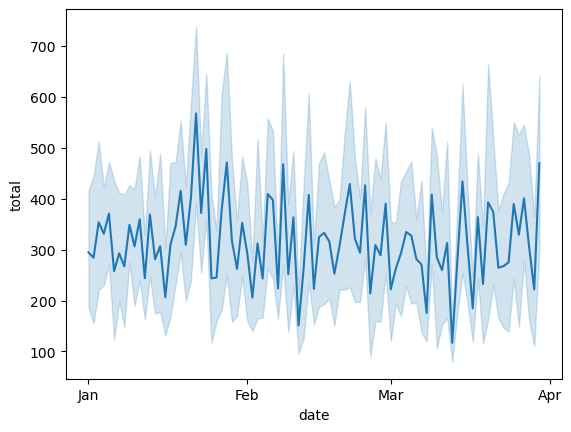

In [38]:
# below is a linegraph 
import matplotlib.dates as mdates

# format the axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# create the graph
sns.lineplot(x="date",y="total",data=data)

Text(65.34722222222221, 0.5, 'Total sales')

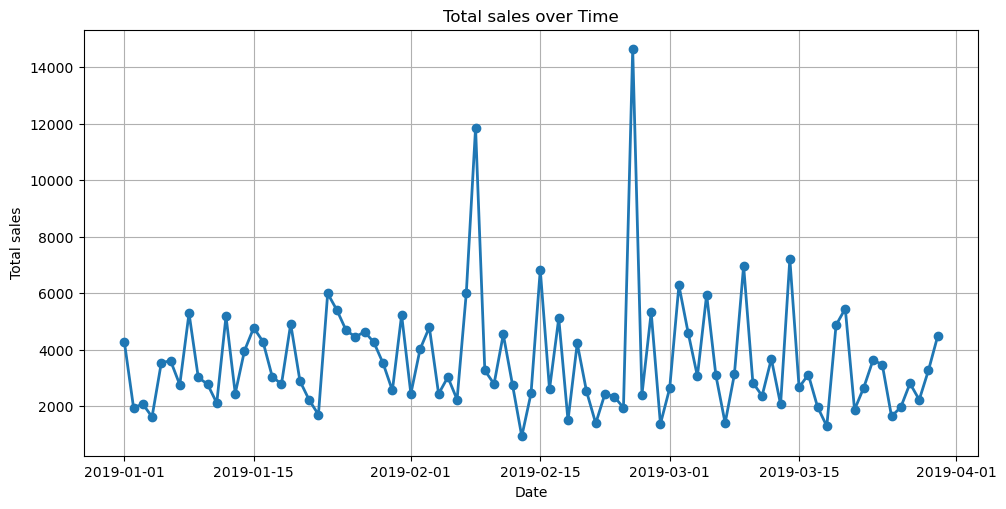

In [42]:
# Below is a linegraph showing the total saled made overtime

data["date"]=pandas.to_datetime(data["date"])

# group by date and sum of total

daily_sales=data.groupby('date')["total"].sum()


# plot
plt.figure(figsize=(10,5))
plt.plot(daily_sales.index,daily_sales.values,marker='o',linestyle="-",linewidth=2)
plt.grid(True)
plt.title("Total sales over Time")
plt.tight_layout()
plt.xlabel("Date")
plt.ylabel("Total sales")

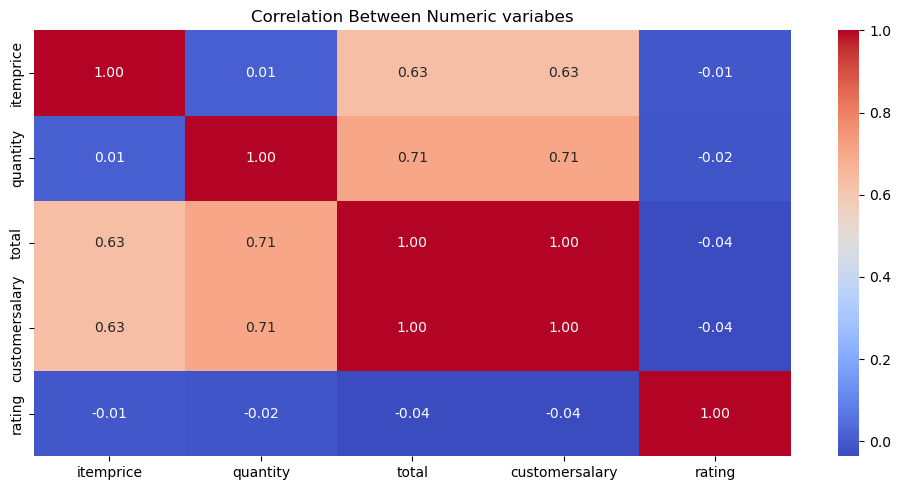

In [44]:
# Below is a heat map that enables us to see the correlation between different entities
numeric_cols=["itemprice","quantity","total","customersalary","rating"]

# below we compute the correlation matrix

corr=data[numeric_cols].corr()

# plot the heatmap
plt.figure(figsize=(10,5))
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt=".2f")
plt.title('Correlation Between Numeric variabes')
plt.tight_layout()